In [12]:
#Import dependencies for ETL
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import plotly.express as px
import matplotlib.pyplot as pyplot
import seaborn as sns
import math


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from   sklearn.compose            import *
from   sklearn.experimental       import enable_iterative_imputer
from   sklearn.impute             import *
from   sklearn.metrics            import balanced_accuracy_score # Evaluation metric 2.0 
from   sklearn.pipeline           import Pipeline
from   sklearn.preprocessing      import *
from   sklearn.linear_model    import *
from   sklearn.metrics         import mean_absolute_error
from sklearn.base import BaseEstimator
from   sklearn.tree import *
from   sklearn.ensemble import *
from sklearn.model_selection  import RandomizedSearchCV
from sklearn.model_selection  import GridSearchCV
from sklearn import set_config
from sklearn.model_selection import cross_val_score

## Load CSV into pandas df

In [3]:
# Use Pandas to read data and transform into pandas dataframe
df = pd.read_csv("data/data.csv", encoding = "utf16")
df.head(3)

,song_name,artist,album,album_release_date,track_popularity,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_id,preview_url,external_url
0,Dámelo To’ (feat. Myke Towers),Selena Gomez,Revelación - EP,2021-03-12,40,0.0,0.787,0.641,8,-7.376,...,0.1010,0.00534,0.0700,0.437,182.003,184134,4,36CiGk9oRdwTnBDMgKEfjl,NaN,https://open.spotify.com/track/36CiGk9oRdwTnBD...
1,LA NOCHE DE ANOCHE,Bad Bunny,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,93,0.0,0.856,0.618,7,-4.892,...,0.0303,0.00000,0.0866,0.391,81.993,203201,4,2XIc1pqjXV3Cr2BQUGNBck,https://p.scdn.co/mp3-preview/a98b639351290bdb...,https://open.spotify.com/track/2XIc1pqjXV3Cr2B...
2,LOCATION,KAROL G,LOCATION,2021-02-12,85,1.0,0.772,0.758,9,-3.891,...,0.0433,0.00000,0.2950,0.654,115.977,265240,4,5Km4r87BoX2qqtoprYS1gh,NaN,https://open.spotify.com/track/5Km4r87BoX2qqto...


In [5]:
# Small sample for testing purposes
# sm_df = df[df['track_popularity'].between(70, 100)]

# sm_y = sm_df.loc[:, 'track_popularity']
# sm_X = sm_df.drop('track_popularity', axis=1)

# sm_X.to_csv('data/sm_X.csv', index=False)
# sm_y.to_csv('data/sm_y.csv', index=False)

# sm_df

,song_name,artist,album,album_release_date,track_popularity,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_id,preview_url,external_url
1,LA NOCHE DE ANOCHE,Bad Bunny,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,93,0.0,0.856,0.618,7,-4.892,...,0.030300,0.000000,0.0866,0.391,81.993,203201,4,2XIc1pqjXV3Cr2BQUGNBck,https://p.scdn.co/mp3-preview/a98b639351290bdb...,https://open.spotify.com/track/2XIc1pqjXV3Cr2B...
2,LOCATION,KAROL G,LOCATION,2021-02-12,85,1.0,0.772,0.758,9,-3.891,...,0.043300,0.000000,0.2950,0.654,115.977,265240,4,5Km4r87BoX2qqtoprYS1gh,NaN,https://open.spotify.com/track/5Km4r87BoX2qqto...
3,telepatía,Kali Uchis,Sin Miedo (del Amor y Otros Demonios) ∞,2020-12-04,92,0.0,0.653,0.524,11,-9.016,...,0.112000,0.000000,0.2030,0.553,83.970,160191,4,6tDDoYIxWvMLTdKpjFkc1B,NaN,https://open.spotify.com/track/6tDDoYIxWvMLTdK...
4,Bandido,Myke Towers,Bandido,2020-12-10,94,0.0,0.713,0.617,8,-4.637,...,0.122000,0.000000,0.0962,0.682,168.021,232853,4,1xK1Gg9SxG8fy2Ya373oqb,https://p.scdn.co/mp3-preview/99b834a17f7f6089...,https://open.spotify.com/track/1xK1Gg9SxG8fy2Y...
5,Hecha Pa' Mi,Boza,Más Negro Que Rojo,2020-07-31,92,0.0,0.725,0.756,4,-5.013,...,0.362000,0.000685,0.1030,0.828,100.070,186133,4,3VvA1wSxukMLsvXoXtlwWx,https://p.scdn.co/mp3-preview/64269c7ce40d69c2...,https://open.spotify.com/track/3VvA1wSxukMLsvX...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166259,Kickstart My Heart,Mötley Crüe,Dr. Feelgood,1989,76,0.0,0.359,0.981,7,-3.622,...,0.001250,0.002360,0.2840,0.271,178.980,282653,4,7GonnnalI2s19OCQO1J7Tf,https://p.scdn.co/mp3-preview/ef2d6aa6a12ee121...,https://open.spotify.com/track/7GonnnalI2s19OC...
166285,Old Pine,Ben Howard,Every Kingdom,2011-01-01,70,0.0,0.401,0.364,5,-10.836,...,0.450000,0.050300,0.1620,0.224,129.570,328507,4,3CAX47TnPqTujLIQTw8nwI,NaN,https://open.spotify.com/track/3CAX47TnPqTujLI...
166288,Nothing Compares 2 U,Sinéad O'Connor,I Do Not Want What I Haven't Got,1990-07-01,73,0.0,0.511,0.574,5,-7.016,...,0.042500,0.000023,0.1050,0.161,119.917,280040,4,3nvuPQTw2zuFAVuLsC9IYQ,https://p.scdn.co/mp3-preview/d50d7c8ec55e72b1...,https://open.spotify.com/track/3nvuPQTw2zuFAVu...
167458,Aerials,System Of A Down,Toxicity,2001-09-04,73,0.0,0.364,0.922,0,-4.217,...,0.000915,0.034600,0.0697,0.227,79.342,235053,4,4e9eGQYsOiBcftrWXwsVco,https://p.scdn.co/mp3-preview/17c08cf40c2f21a4...,https://open.spotify.com/track/4e9eGQYsOiBcftr...


# Exploratory Data Analysis
### Make plots to visually find correlationship between variables 

#### Popularity vs. Duration (milliseconds)
##### There seems to be a clear correlation between Song Duration and Popularity: Shorter songs make for most popular ones. We will keep Duration for the ML model training.

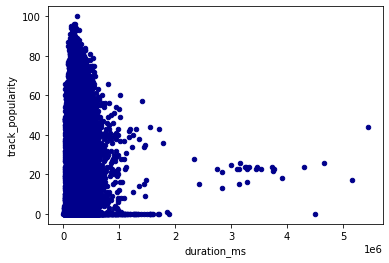

In [9]:
pop_v_dur = df.plot.scatter(x='duration_ms',
                      y='track_popularity',
                      c='DarkBlue')

#### Popularity vs. Spechiness
##### Most Popular songs have between 0.1 and 0.5 Speechiness. This seems to make sense, as having too much lyrics might make it harder for the listener to remember most of them, while having less lyrics is easier to follow. We will keep Spechiness as a relevant attribute for the ML model training.

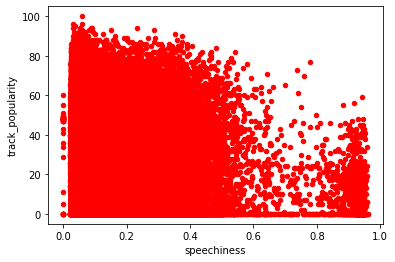

In [4]:
pop_v_sp = df.plot.scatter(x='speechiness',
                    y='track_popularity',
                      c='Red')

#### Popularity vs. Instrumentalness
##### Based on the outliers, it seems that very low Instrumentalness is correlated with high Popularity, but in the bigger picture, there is no clear correlation, so we won't be using this.

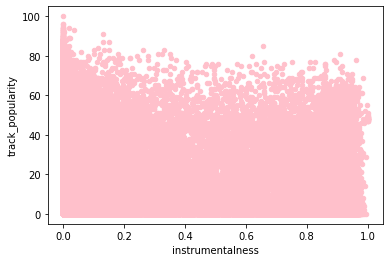

In [5]:
pop_v_inst = df.plot.scatter(x='instrumentalness',
                    y='track_popularity',
                      c='pink')

#### Popularity vs. Valence
##### Valence, that could be understood as 'happiness', does not seem to directly correlate to Popularity. This makes sense, as a sad song could also be a hit.

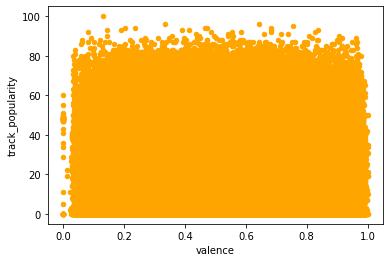

In [6]:
pop_v_vl = df.plot.scatter(x='valence',
                    y='track_popularity',
                      c='Orange')

#### Popularity vs. Tempo
##### Tempo (the 'speed of a song') does show that songs with tempos between 60bpm and 150bpm tend to be the mos popular. So that means that too slow or too fast songs don't make it to the hit zone.

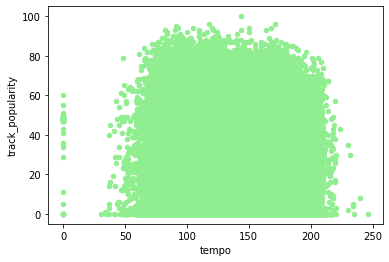

In [7]:
pop_v_tmp = df.plot.scatter(x='tempo',
                    y='track_popularity',
                      c='lightGreen')

#### Popularity vs. Danceability
##### Danceability seems to be direclty correlated to Popularity: It seems like, the more danceable a song is, the most popular it can become.

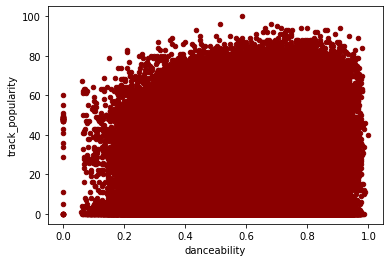

In [8]:
pop_v_dnc = df.plot.scatter(x='danceability',
                      y='track_popularity',
                      c='darkRed')

#### Popularity vs. Energy
##### Low Energy songs definitely are not too popular. It seems that Energy does correlate to Popularity and, even if the highest Energy rate songs are not the most popular one, the correlation is strong in the 0.5 to 0.8 Energy segment.

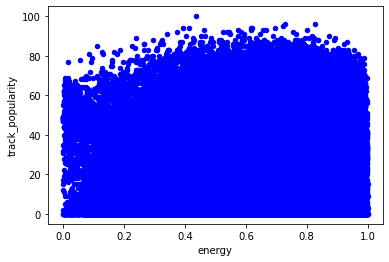

In [9]:
pop_v_eng = df.plot.scatter(x='energy',
                    y='track_popularity',
                      c='blue')

#### Popularity vs. Loudness
##### There is definitely correlation between Loudness and Popularity: It seems that most Popular songs range from -15 to -5 decibels.

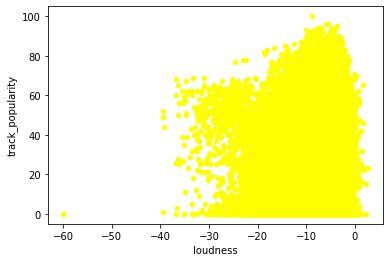

In [10]:
pop_v_ldn = df.plot.scatter(x='loudness',
                    y='track_popularity',
                      c='yellow')

#### Popularity vs. Time Signature
###### It is widely spoken that commercial success music tends to be written with some rythmic bars conventions, such as being mainly written in  ###### 4/4 bar measurement (4), or 3/4 (3). This idea is reinforced by the plot, as it shows most popular songs are in the 4 Time Signature category.

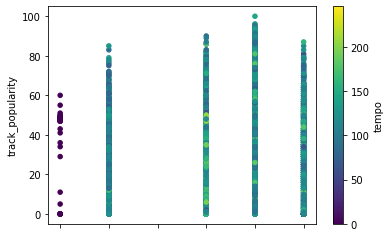

In [11]:
pop_v_tims = df.plot.scatter(x='time_signature',
                    y='track_popularity',
                      c='tempo',
                      colormap='viridis')

### Digging deeper: Popularity vs. Rythm and Harmony
#### Of the selected attributes, there are three that are part of musical composition:
#### Key - The harmonic key in which the song is composed.
#### Mode - Major or minor, directly influencing the harmonic key.
#### Time Signature - This lead to the rythmical structure of a song and in this study, represented by a range from 0 to 5 bars per barline.
#### Let's create some specific df's for them.

In [12]:
# Create a df with just the more popular songs, with a Popularity rate of 70 up to 100 (This reduces the tracklist from 170K songs to 3K)
keyDf = df[df['track_popularity'].between(70, 100)]


In [16]:
#Drop non harmonical or rythmical attributes (except for Popularity)

k_frequency = keyDf.drop(['artist','album', 'album_release_date', 'explicit', 'danceability',
                            'duration_ms', 'energy', 'instrumentalness', 'acousticness',
                            'liveness', 'loudness', 'speechiness', 'tempo', 
                           'valence', 'song_id', 'preview_url', 'external_url'], axis=1)

#Replace numerical labeling for harmonical labeling in df

k_frequency['key'] = k_frequency['key'].replace([0],'C')
k_frequency['key'] = k_frequency['key'].replace([1], 'D♯/D♭')
k_frequency['key'] = k_frequency['key'].replace([2],'D')
k_frequency['key'] = k_frequency['key'].replace([3], 'D♯/E♭')
k_frequency['key'] = k_frequency['key'].replace([4],'E')
k_frequency['key'] = k_frequency['key'].replace([5], 'F')
k_frequency['key'] = k_frequency['key'].replace([6], 'F♯/G♭')
k_frequency['key'] = k_frequency['key'].replace([7],'G')
k_frequency['key'] = k_frequency['key'].replace([8], 'G♯/A♭')
k_frequency['key'] = k_frequency['key'].replace([9],'A')
k_frequency['key'] = k_frequency['key'].replace([10], 'A♯/B♭')
k_frequency['key'] = k_frequency['key'].replace([11], 'B')

#Now, the key column shows the musical keys instead of confusing numbers for users unfamiliar with Spotify API's documentation
k_frequency.head(5)

,song_name,track_popularity,key,mode,time_signature
1,LA NOCHE DE ANOCHE,93,G,1,4
2,LOCATION,85,A,1,4
3,telepatía,92,B,0,4
4,Bandido,94,G♯/A♭,1,4
5,Hecha Pa' Mi,92,E,1,4


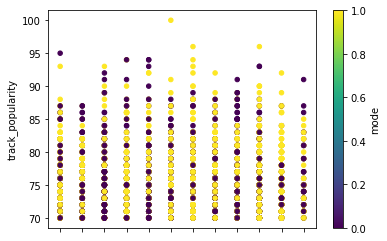

In [17]:
#By plotting these, we can se that there is a wide distribution between Keys and Popularity. Yellow represents songs written
#in Major tones and purple, in minor
pop_v_key = k_frequency.plot.scatter(x='key',
                      y='track_popularity',
                      c='mode',
                      colormap='viridis')

# Prepare data for ML models

In [20]:
#Check columns and select the most relevant statistic attributes according to observed correlationships
df.head(5)

,song_name,artist,album,album_release_date,track_popularity,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_id,preview_url,external_url
0,Dámelo To’ (feat. Myke Towers),Selena Gomez,Revelación - EP,2021-03-12,40,0.0,0.787,0.641,8,-7.376,...,0.1010,0.00534,0.0700,0.437,182.003,184134,4,36CiGk9oRdwTnBDMgKEfjl,NaN,https://open.spotify.com/track/36CiGk9oRdwTnBD...
1,LA NOCHE DE ANOCHE,Bad Bunny,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,93,0.0,0.856,0.618,7,-4.892,...,0.0303,0.00000,0.0866,0.391,81.993,203201,4,2XIc1pqjXV3Cr2BQUGNBck,https://p.scdn.co/mp3-preview/a98b639351290bdb...,https://open.spotify.com/track/2XIc1pqjXV3Cr2B...
2,LOCATION,KAROL G,LOCATION,2021-02-12,85,1.0,0.772,0.758,9,-3.891,...,0.0433,0.00000,0.2950,0.654,115.977,265240,4,5Km4r87BoX2qqtoprYS1gh,NaN,https://open.spotify.com/track/5Km4r87BoX2qqto...
3,telepatía,Kali Uchis,Sin Miedo (del Amor y Otros Demonios) ∞,2020-12-04,92,0.0,0.653,0.524,11,-9.016,...,0.1120,0.00000,0.2030,0.553,83.970,160191,4,6tDDoYIxWvMLTdKpjFkc1B,NaN,https://open.spotify.com/track/6tDDoYIxWvMLTdK...
4,Bandido,Myke Towers,Bandido,2020-12-10,94,0.0,0.713,0.617,8,-4.637,...,0.1220,0.00000,0.0962,0.682,168.021,232853,4,1xK1Gg9SxG8fy2Ya373oqb,https://p.scdn.co/mp3-preview/99b834a17f7f6089...,https://open.spotify.com/track/1xK1Gg9SxG8fy2Y...


In [10]:
#Drop unique values columns such as Number, Title and year
mlData = df.drop(['song_name', 'artist', 'album', 'album_release_date', 'song_id', 'preview_url', 'external_url'], axis=1)

#Create binnary column based on track_popularity. This will 'rate' the most popular songs with 1 and the less popular songs, with 0
# mlData['popular'] = pd.cut(mlData['track_popularity'], bins=2, labels=[0, 1])

#Drop original Popularity column (track_popularity)
# mlData = mlData.drop(['track_popularity'], axis=1)

#We now have only numerical values, specially for Popularity, that will become the Y axis.
mlData

,track_popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,40,0.0,0.787,0.641,8,-7.376,1,0.3150,0.1010,0.005340,0.0700,0.437,182.003,184134,4
1,93,0.0,0.856,0.618,7,-4.892,1,0.2860,0.0303,0.000000,0.0866,0.391,81.993,203201,4
2,85,1.0,0.772,0.758,9,-3.891,1,0.0482,0.0433,0.000000,0.2950,0.654,115.977,265240,4
3,92,0.0,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,160191,4
4,94,0.0,0.713,0.617,8,-4.637,1,0.0887,0.1220,0.000000,0.0962,0.682,168.021,232853,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167495,2,0.0,0.732,0.670,7,-12.455,1,0.0443,0.0013,0.941000,0.0960,0.905,103.073,219794,4
167496,2,0.0,0.859,0.869,7,-5.138,1,0.0518,0.1340,0.000383,0.0263,0.923,99.424,167147,4
167497,1,0.0,0.763,0.369,7,-9.124,1,0.0332,0.2460,0.000000,0.0532,0.915,92.314,193733,4
167498,7,0.0,0.691,0.578,7,-7.174,1,0.0594,0.2510,0.000000,0.0439,0.965,99.877,174800,4


## Extra: From top popular songs (Popularity => 70), create X and y axis csv files for testing purposes.

In [11]:
# From df, create X and y CSV files to be fitted into the ML model.
key_y = keyDf.loc[:, 'track_popularity']
key_X = keyDf.drop('track_popularity', axis=1)

key_X.to_csv('data/key_X.csv', index=False)
key_y.to_csv('data/key_y.csv', index=False)



NameError: name 'keyDf' is not defined

#### Splitting and scaling data

In [12]:
#Import scikitlearn dependencies and tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [14]:
#Split between y = popular / X = all the other attributes
y = mlData.loc[:, 'track_popularity']
X = mlData.drop('track_popularity', axis=1)

In [15]:
#Define train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

In [13]:
#Scale and fit
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Create pipeline

In [14]:
from   sklearn.pipeline           import Pipeline

In [15]:
col = X.columns.tolist()

In [16]:
X

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.0,0.787,0.641,8,-7.376,1,0.3150,0.1010,0.005340,0.0700,0.437,182.003,184134,4
1,0.0,0.856,0.618,7,-4.892,1,0.2860,0.0303,0.000000,0.0866,0.391,81.993,203201,4
2,1.0,0.772,0.758,9,-3.891,1,0.0482,0.0433,0.000000,0.2950,0.654,115.977,265240,4
3,0.0,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,160191,4
4,0.0,0.713,0.617,8,-4.637,1,0.0887,0.1220,0.000000,0.0962,0.682,168.021,232853,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167495,0.0,0.732,0.670,7,-12.455,1,0.0443,0.0013,0.941000,0.0960,0.905,103.073,219794,4
167496,0.0,0.859,0.869,7,-5.138,1,0.0518,0.1340,0.000383,0.0263,0.923,99.424,167147,4
167497,0.0,0.763,0.369,7,-9.124,1,0.0332,0.2460,0.000000,0.0532,0.915,92.314,193733,4
167498,0.0,0.691,0.578,7,-7.174,1,0.0594,0.2510,0.000000,0.0439,0.965,99.877,174800,4


In [17]:
onehot_cat = ['mode','explicit', 'key'] # one hot encode these features

In [18]:
con_cat = [i for i in col if i not in onehot_cat] # continuous data

In [19]:
# Create onehotencoding pipeline, impute most frequent feature if missing
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True))
])

In [20]:
# Standardize continous data, use nearest neighbors for missing features
con_pipe = Pipeline([
    ('SS', StandardScaler()),
    ('KNN', KNNImputer(n_neighbors=5))
])

In [21]:
# Using column transformer to pack all features together, and assign them as categorial and continous data
preprocessor = ColumnTransformer([
    ('categorical', cat_pipe, onehot_cat),
    ('continuous', con_pipe, con_cat)
])

## Fitting ML models

In [22]:
# define dummy estimator for testing regressors
class DummyEstimator(BaseEstimator):
    "Pass through class, methods are present but do nothing."
    def fit(self): pass
    def score(self): pass

### Ensemble Bagging
###### Next, we are moving onto ensemble methods. Specifically Bagging and Random Forests. For bagging regressors, only two hyperparameters are explored here: n_est and max_features. n_est is specifying the number of trees in the model. This is done to reduce overfitting like decision trees. max_features represents the number of features chosen per each tree. This is a way of bootstrapping to weaken the trees. By doing so, this allows better generalization and avoid overfitting.

In [23]:
n_est = [100, 150] # num of trees (base_estimators)
max_features = [0.8, 1.0] # features in base_estimators
search_space = [{'bag': [BaggingRegressor(n_jobs=-1)], # Actual Estimator
                 'bag__n_estimators': n_est,
                 'bag__max_features': max_features}]

bag_final_pipe = Pipeline([('preprocessor', preprocessor),
                ('bag', TransformedTargetRegressor(regressor=DummyEstimator(),
                                                         transformer=QuantileTransformer(n_quantiles=300,
                                                         output_distribution='normal')))])                

bag_randcv = RandomizedSearchCV(estimator=bag_final_pipe, 
                                 param_distributions=search_space,
                                 cv=5,
                                 scoring=['neg_root_mean_squared_error', 'neg_mean_squared_error'],
                                 n_jobs=-1,
                                 verbose=1,
                                 random_state=42,
                                 refit='neg_root_mean_squared_error')

In [24]:
bag_randcv.fit(X_train, y_train)

c:\users\jonat\desktop\bootcamp\bootcamp\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore')),
                                                                                               ('imputer',
                                                                                                SimpleImputer(add_indicator=True,
                                                                                                              strategy='most_frequent'))]),
                                                                               ['mode',
                                                                                'explicit',
                      

In [25]:
bag_randcv.best_score_

-20.430850413194158

### Ensemble - Random Forest
###### Next, we are moving onto ensemble methods. Specifically Bagging and Random Forests. For bagging regressors, only two hyperparameters are explored here: n_est and max_features. n_est is specifying the number of trees in the model. This is done to reduce overfitting like decision trees. max_features represents the number of features chosen per each tree. This is a way of bootstrapping to weaken the trees. By doing so, this allows better generalization and avoid overfitting.

In [26]:
n_est = [100, 150]
min_samples_split = [2, 5]
min_samples_leaf = [2]
max_depth = [100, 150, 250]
search_space = [{'rf': [RandomForestRegressor(n_jobs=-1)], # Actual Estimator
                 'rf__n_estimators': n_est,
                 'rf__min_samples_split': min_samples_split,
                 'rf__min_samples_leaf': min_samples_leaf,
                 'rf__max_depth': max_depth}]

rf_final_pipe = Pipeline([('preprocessor', preprocessor),
                ('rf', TransformedTargetRegressor(regressor=DummyEstimator(),
                                                         transformer=QuantileTransformer(n_quantiles=300,
                                                         output_distribution='normal')))])                

rf_randcv = RandomizedSearchCV(estimator=rf_final_pipe, 
                                 param_distributions=search_space, 
                                 n_iter=12,
                                 cv=5,
                                 scoring=['neg_root_mean_squared_error', 'neg_mean_squared_error'],
                                 n_jobs=-1,
                                 verbose=1,
                                 random_state=42,
                                 refit='neg_root_mean_squared_error')

In [27]:
rf_randcv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore')),
                                                                                               ('imputer',
                                                                                                SimpleImputer(add_indicator=True,
                                                                                                              strategy='most_frequent'))]),
                                                                               ['mode',
                                                                                'explicit',
                      

In [28]:
rf_randcv.best_score_

-20.382166252868082

In [29]:
rf_randcv.best_params_

{'rf__n_estimators': 150,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 2,
 'rf__max_depth': 250,
 'rf': RandomForestRegressor(max_depth=250, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, n_jobs=-1)}

## Models evaluation scores

In [30]:
print(f'Bagging Regressor: {round(bag_randcv.best_score_, 3)}')
print(f'Random Forest Regressor: {round(rf_randcv.best_score_, 3)}')

Bagging Regressor: -20.431
Random Forest Regressor: -20.382


In [31]:
from sklearn.metrics import classification_report


In [33]:
bag_randcv.best_params_

{'bag__n_estimators': 150,
 'bag__max_features': 0.8,
 'bag': BaggingRegressor(max_features=0.8, n_estimators=150, n_jobs=-1)}

In [34]:
model_final = BaggingRegressor(n_estimators=150, max_features = 1.0, n_jobs=-1)
model_final_pipe = Pipeline([('preprocessor', preprocessor),
                ('bag', TransformedTargetRegressor(regressor=model_final,
                                                         transformer=QuantileTransformer(n_quantiles=300,
                                                         output_distribution='normal')))])
model_final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent'))]),
                                                  ['mode', 'explicit', 'key']),
                                                 ('continuous',
                                                  Pipeline(steps=[('SS',
                                                                   StandardScaler()),
                                                                  ('KNN',
                                                     

In [35]:
# Prediction on test set
y_pred = model_final_pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.6f}")

MAE: 22.234154
